In [1]:
from tribarmes import TriangleBarMesh, MakeTriangleBoxing

stlfile = "stlsamples/onshapetestpart.stl"
stlfile = "stlsamples/frameguide.stl"

tbarmesh = TriangleBarMesh(stlfile)
tboxing = MakeTriangleBoxing(tbarmesh)


make triangle boxing at 0.4800000000000001


In [2]:
from implicitareas import implicitareaballoffset
iaoffset = implicitareaballoffset.ImplicitAreaBallOffset(tboxing)


In [3]:
from basicgeo import P2, P3, Partition1

nslices = 10
rad = 4

rex = rad + 2.5
xpart = Partition1(tbarmesh.xlo-rex, tbarmesh.xhi+rex, 145)
ypart = Partition1(tbarmesh.ylo-rex, tbarmesh.yhi+rex, 137)
zlevels = [ ]
for i in range(0, nslices):
    lam = (i+0.5)/nslices
    zlevels.append((tbarmesh.zlo-rad)*(1 - lam) + (tbarmesh.zhi+rad)*lam)
zlevels.reverse()

In [4]:
import barmesh, mainfunctions
from barmeshslicer import BarMeshSlicer

zcontours = [ ]
for z in zlevels:
    bm = barmesh.BarMesh()
    bm.BuildRectBarMesh(xpart, ypart, z)
    rd2 = max(xpart.vs[1]-xpart.vs[0], ypart.vs[1]-ypart.vs[0], rad*1.5) + 0.1
    bms = BarMeshSlicer(bm, iaoffset, rd=rad, rd2=rd2, contourdotdiff=0.95, contourdelta=0.05, lamendgap=0.001)
    bms.initializecutsanddistances()
    currentcolour = -1
    ncount = 0
    while bms.barpolycuts:
        currentcolour += 1
        if currentcolour > bm.maxcellcolour:
            currentcolour = 0
        bms.splitbarpolyscolour(currentcolour)
        ncount += 1
        if ncount == 80:
            break
        if 0:
            print("ncount", ncount, currentcolour, len(bms.barpolycuts)) 

    if 1:
        print("z:%.3f pztime:%.3f/%d cbtime:%.3f/%d remains: %3f" % (z, bms.pztime, bms.pzcalls, bms.cbtime+bms.cbztime, bms.cbcalls, (bms.totalproctime - bms.pztime - bms.cbtime)))

    contours, contbars = mainfunctions.BarMeshContoursF(bm, barmesh.PZ_BEYOND_R)
    zcontours.append([z, contours])


z:42.550 pztime:40.891/20148 cbtime:1.908/296 remains: 0.940669
z:37.650 pztime:39.989/20148 cbtime:1.758/328 remains: 0.713737
z:32.750 pztime:43.131/20188 cbtime:4.526/778 remains: 2.455730
z:27.850 pztime:42.873/20188 cbtime:4.528/838 remains: 2.007260
z:22.950 pztime:40.060/20272 cbtime:10.301/1419 remains: 4.027415
z:18.050 pztime:40.991/20244 cbtime:7.118/1348 remains: 3.272731
z:13.150 pztime:41.538/20296 cbtime:8.042/1554 remains: 3.779239
z:8.250 pztime:45.661/20296 cbtime:7.734/1508 remains: 3.298650
z:3.350 pztime:40.731/20224 cbtime:3.974/820 remains: 1.912804
z:-1.550 pztime:39.092/20176 cbtime:3.517/784 remains: 1.551315


(-26.4, 26.4) (-61.35, 56.35) (-2.3749791636638613e-15, 41.0) 58.85


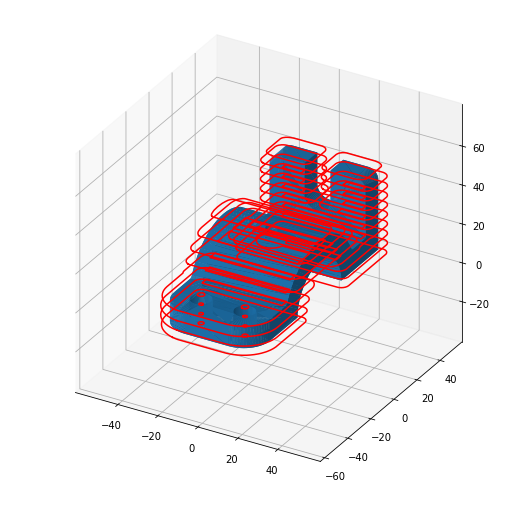

In [34]:
%matplotlib inline 

ax = plottriangles(tbarmesh)
mainfunctions.set_aspect_equal_3d()
for z, contours in zcontours:
    for cont in contours:
        ax.plot([p.x  for p in cont], [p.y  for p in cont], [z]*len(cont), color='red')


In [7]:
# Do using ipyvolume
import ipyvolume as ipv
import numpy as np

# quickly make these as independent triangles
vs = tbarmesh.GetBarMeshTriangles()
vv = np.array(vs).ravel()
X, Y, Z = vv[0::3], vv[1::3], vv[2::3]
tris = np.array(range(len(vs)*3))
tris.resize((len(vs), 3))


In [35]:
ipv.figure()
ipv.plot_trisurf(X, Y, Z, triangles=tris, color='cyan')
for z, contours in zcontours:
    for cont in contours:
        ipv.plot(np.array([p.x  for p in cont]), np.array([p.y  for p in cont]), np.array([p.z  for p in cont]), color="red")
ipv.xyzlim(-40,40)
ipv.show()
